<h2>Task 2</h2>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Input: number of samples N
# Output: one-dimensional data set of N points where y_n = sin(2 pi x_n) + epsilon_n as in lecture
def sine_data_set(N):
  np.random.seed(1234)
  x = np.random.uniform(0,1,(N))
  y = np.sin(x*2*np.pi)+np.random.normal(scale=0.2,size=(N))
  return x,y


# Input: one-dimensional inputs x as vector of length N, polynomial degree d 
# Output: polynomial feature representation of the inputs as N x (d+1) matrix 
def poly_features(x,d):
  X = np.zeros((x.shape[0],d+1))
  for i in range(0,d+1):
    X[:,i] = np.power(x,i)
  return X


# Input: instances X as N x M matrix, labels y as vector of length N, lambda for regularization
# Output: learned parameter vector
def fit_ridge_regression(X,y,lambda_param):
  N = X.shape[0]
  M = X.shape[1]
  return np.linalg.solve(X.T @ X + N*lambda_param*np.eye(M), X.T @ y)


# Input: instances X as N x M matrix, model theta
# Output: predictions of model theta on X
def predict_regression(X,theta):
  return X @ theta


# Input: instances X, labels y, number of cross-validation folds K, current fold k
# Output: train and test sets for fold k
def crossval_split(X,y,K,k):
  x_parts = np.array_split(X, K)
  y_parts = np.array_split(y, K)
  X_test = x_parts[k]
  y_test = y_parts[k]
  x_parts.pop(k)
  y_parts.pop(k)
  X_train = np.concatenate(x_parts)
  y_train = np.concatenate(y_parts)
  return X_train, y_train, X_test, y_test


best d is : 3


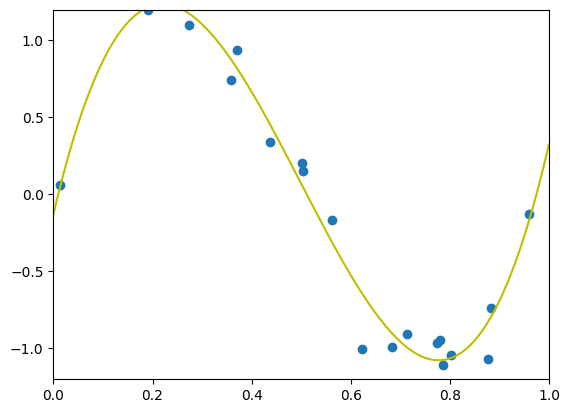

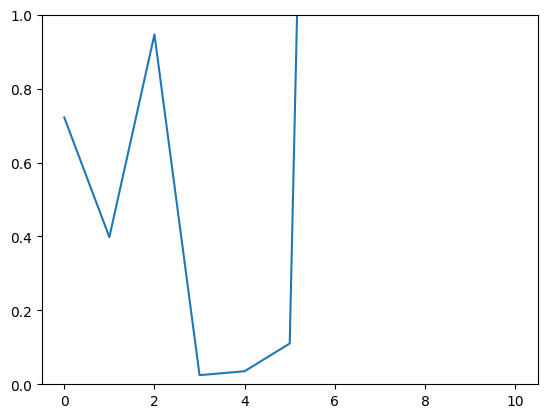

In [51]:
N = 20
x,y = sine_data_set(N)
plt.xlim([0,1])
plt.ylim([-1.2,1.2])
plt.scatter(x,y)
def GridSearch_d(x,y):
    lamb = 0
    best_loss = float('inf')
    best_model_theta = None
    best_d = None
    loss_history = []    
    K = 4
    for d in range(0, 11):
        losses = 0
        for k in range(K):
            X_train, y_train, X_test, y_test = crossval_split(x,y,K ,k)
            X = poly_features(X_train,d)
            X_TEST = poly_features(X_test,d)
            theta = fit_ridge_regression(X,y_train,lamb)
            y_predict = predict_regression(X_TEST,theta)
            mse = mean_squared_error(y_test, y_predict)
            losses += mse
        losses /=  K
        loss_history.append(losses)
        if losses < best_loss:
            best_loss = losses
            best_model_theta = theta
            best_d = d
    print(f'best d is : {best_d}')
    X = poly_features(x,best_d)
    theta = fit_ridge_regression(X,y,lamb)
    grid = np.arange(0,1,0.001)
    plt.plot(grid,predict_regression(poly_features(grid,best_d),theta),'y')
    fig, ax = plt.subplots()
    ax.plot(range(0, 11), loss_history)
    ax.set_ylim(0, 1)
    plt.show()

GridSearch_d(x, y)

best lambda is : 1e-06


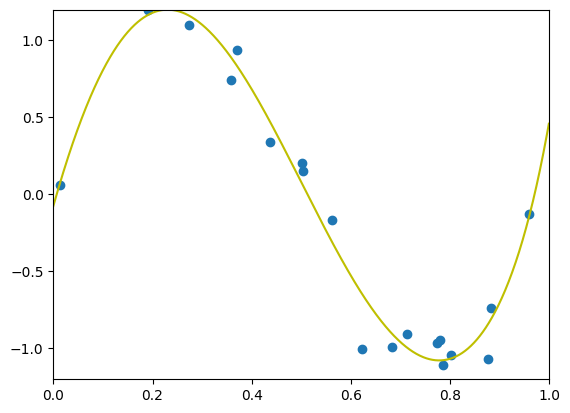

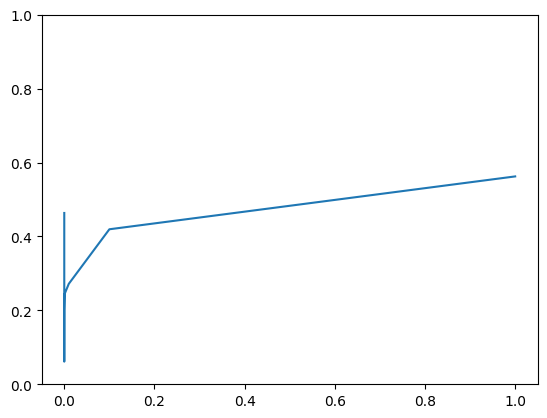

In [54]:
N = 20
x,y = sine_data_set(N)
plt.xlim([0,1])
plt.ylim([-1.2,1.2])
plt.scatter(x,y)
def GridSearch_lamb(x,y):
    d = 10
    lambda_values = np.logspace(0, -9, num=10, base=10)
    best_loss = float('inf')
    best_model_theta = None
    best_lamb = None
    loss_history = []    
    K = 4
    for lamb in lambda_values:
        losses = 0
        for k in range(K):
            X_train, y_train, X_test, y_test = crossval_split(x,y,K ,k)
            X = poly_features(X_train,d)
            X_TEST = poly_features(X_test,d)
            theta = fit_ridge_regression(X,y_train,lamb)
            y_predict = predict_regression(X_TEST,theta)
            mse = mean_squared_error(y_test, y_predict)
            losses += mse
        losses /=  K
        loss_history.append(losses)
        if losses < best_loss:
            best_loss = losses
            best_model_theta = theta
            best_lamb = lamb
    print(f'best lambda is : {best_lamb}')
    X = poly_features(x,d)
    theta = fit_ridge_regression(X,y,best_lamb)
    grid = np.arange(0,1,0.001)
    plt.plot(grid,predict_regression(poly_features(grid,10),theta),'y')
    fig, ax = plt.subplots()
    ax.plot(lambda_values, loss_history)
    ax.set_ylim(0, 1)
    plt.show()

GridSearch_lamb(x, y)